In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

SyntaxError: invalid syntax (2900967693.py, line 5)

In [14]:
#Melihat 10 data teratas
df=pd.read_csv("data\data.csv", encoding='latin-1')
df.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


Pengecekan dan penghapusan data duplikat

In [19]:
duplicates = df.duplicated().sum()

# menghapus duplikat pada data
df = df.drop_duplicates()
print('Jumlah baris duplikat setelah drop:', duplicates)

Jumlah baris duplikat setelah drop: 0


In [23]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [27]:
#ukuran data frame (row, kolom)
df.shape

(13044, 13)

In [28]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


Feature engineering (penambahan kolom jumlah karakter dan jumlah kata)

In [30]:
df['total_char'] = df['Tweet'].apply(len)
df['total_word'] = df['Tweet'].apply(lambda sent: len(sent.split()))

In [32]:
df.head(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


Measure of central tendency

In [46]:
print("Rata-rata jumlah karakter =") 
df['total_char'].mean()

Rata-rata jumlah karakter =


114.12434835939895

In [47]:
print("Rata-rata jumlah kata =") 
df['total_word'].mean()

Rata-rata jumlah kata =


17.264259429622815

In [48]:
print("Nilai tengah karakter =") 
df['total_char'].median()

Nilai tengah karakter =


100.0

In [49]:
print("Nilai tengah kata =") 
df['total_word'].median()

Nilai tengah kata =


15.0

Measure of spread

In [52]:
#range: perbedaan min dan max jlh karakter
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

557

In [53]:
#range: perbedaan min dan max jlh kata
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

51

In [57]:
#quartile dan interquartile range char

#cari nilai minimum
pc = df.total_char.min()

#cari nilai maksimum
pcmax = df.total_char.max()

#cari quartile 1
q1c = df.total_char.quantile(0.25)

#cari quartile 2
q2c = df.total_char.quantile(0.5)

#cari quartile 3
q3c = df.total_char.quantile(0.75)

#cari IQR
iqrc = q3c - q1c

#cari batas bawah
lower_limitc = q1c - 1.5 * iqrc

#cari batas atas
upper_limitc = q3c + 1.5 * iqrc

In [58]:
print("batas bawah 'total_char' : ", lower_limitc)
print("nilai minimum", pc)

if lower_limitc < pc:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("batas atas 'total_char :", upper_limitc)
print("nilai maksimum", pcmax)

if upper_limitc > pcmax:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah 'total_char' :  -80.5
nilai minimum 4
Tidak ada outlier dari sisi batas bawah

batas atas 'total_char : 291.5
nilai maksimum 561
ada outlier dari sisi batas atas


In [59]:
#quartile dan interquartile range word

#cari nilai minimum
pw = df.total_word.min()

#cari nilai maksimum
pwmax = df.total_word.max()

#cari quartile 1
q1w = df.total_word.quantile(0.25)

#cari quartile 2
q2w = df.total_word.quantile(0.5)

#cari quartile 3
q3w = df.total_word.quantile(0.75)

#cari IQR
iqrw = q3w - q1w

#cari batas bawah
lower_limitw = q1w - 1.5 * iqrw

#cari batas atas
upper_limitw = q3w + 1.5 * iqrw

In [60]:
print("batas bawah 'total_word' : ", lower_limitw)
print("nilai minimum", pc)

if lower_limitw < pw:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("batas atas 'total_word :", upper_limitw)
print("nilai maksimum", pwmax)

if upper_limitw > pwmax:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah 'total_word' :  -12.0
nilai minimum 4
Tidak ada outlier dari sisi batas bawah

batas atas 'total_word : 44.0
nilai maksimum 52
ada outlier dari sisi batas atas


In [62]:
#variance char

print(df['total_char'].mean())
print(df['total_char'].var())

114.12434835939895
4775.035061485935


In [63]:
#variance word

print(df['total_word'].mean())
print(df['total_word'].var())

17.264259429622815
104.91053421345475


Measure of shape, described (skewness, kurtosis)

In [67]:
print("Skewness karakter:", df['total_char'].skew())

Skewness karakter: 0.6936467482723248


In [68]:
print("Skewness word:", df['total_word'].skew())

Skewness word: 0.7898198026333267


Handle outlier data

In [70]:
#outlier char
print("Upper limit char:",upper_limitc)
print("Upper limit word:",upper_limitw)

Upper limit char: 291.5
Upper limit word: 44.0


In [71]:
df = df[df['total_char'] < upper_limitc]
df = df[df['total_word'] < upper_limitw]

In [73]:
#ukuran dataframe setelah menghilangkan outlier char dan word
df.shape

(12912, 15)

Visualizing data

<AxesSubplot: >

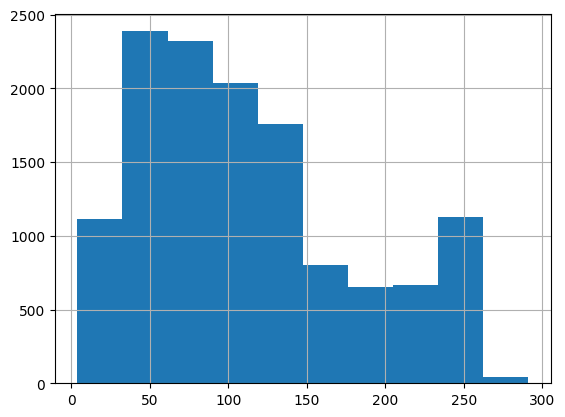

In [74]:
df.total_char.hist()

<AxesSubplot: >

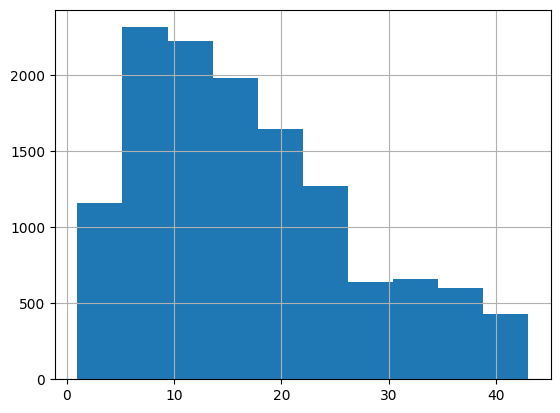

In [75]:
df.total_word.hist()

Bivariate analysis

In [87]:
corr=df['total_char'].corr(df['total_word'])
print("Korelasi antara jumlah karakter dan jumlah kata tweet:",corr)

if corr>0.5:
    print("Terdapat korelasi yang signifikan antara keduanya")
else:
    print("Tidak terdapat korelasi yang tinggi antara keduanya")

Korelasi antara jumlah karakter dan jumlah kata tweet: 0.9568531678220228
Terdapat korelasi yang signifikan antara keduanya


<AxesSubplot: xlabel='total_word', ylabel='total_char'>

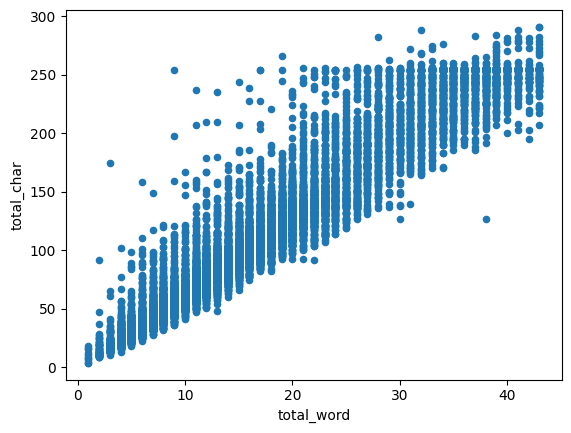

In [88]:
#scatter plot
df.plot(x="total_word", y="total_char", kind="scatter")